In [1]:
import numpy as np
import h5py
import os
from glob import glob
import matplotlib.pyplot as plt
from skimage.transform import rescale
from skimage.measure import compare_psnr,compare_ssim
import scipy.misc


In [8]:
def rgb2ycbcr (img):
    y = 16 + (65.481 * img[:, :, 0]) + (128.553 * img[:, :, 1]) + (24.966 * img[:, :, 2])
    return y / 255

# Generate whole super resolution image

In [2]:
f= h5py.File('/scratch/gilbreth/li3120/RDB/Test_Result/B100_18.h5', "r")

In [3]:
rec=f['rec']
gt=f['gt']

In [4]:
np.shape(gt[9])

(128, 128, 3)

In [5]:
len(rec)

2130

In [6]:
np.shape(gt)

(2130, 128, 128, 3)

In [10]:
#B100 x4 593-616
img=np.squeeze(rec[10,:,:,:])
imgg=np.squeeze(gt[10,:,:,:])

In [11]:
limage=np.zeros((64*5,64*7,3))
limagg=np.zeros((64*5,64*7,3))
ave_ssim=np.zeros((24,1))
ave_psnr=np.zeros((24,1))
for i in range(593,617):
    limage[(i-593)//6*64:(i-593)//6*64+64,(i-593)%6*64:(i-593)%6*64+64,:]=np.squeeze(rec[i,:64,:64,:])
    limagg[(i-593)//6*64:(i-593)//6*64+64,(i-593)%6*64:(i-593)%6*64+64,:]=np.squeeze(gt[i,:64,:64,:])
    #ave_ssim[i-593]=compare_ssim(rgb2ycbcr(np.clip(img,a_min=0,a_max=1)),rgb2ycbcr(imgg))
    #ave_psnr[i-593]=compare_ssim(rgb2ycbcr(np.clip(img,a_min=0,a_max=1)),rgb2ycbcr(imgg))
limage[0:128,5*64:,:]=np.squeeze(rec[598,:,:,:])
limage[64:64+128,5*64:,:]=np.squeeze(rec[604,:,:,:])
limage[128:128+128,5*64:,:]=np.squeeze(rec[610,:,:,:])
limage[192:192+128,5*64:,:]=np.squeeze(rec[616,:,:,:])
limage[192:192+128,:128,:]=np.squeeze(rec[611,:,:,:])
limage[192:192+128,64:64+128,:]=np.squeeze(rec[612,:,:,:])
limage[192:192+128,128:128+128,:]=np.squeeze(rec[613,:,:,:])
limage[192:192+128,192:192+128,:]=np.squeeze(rec[614,:,:,:])
limagg[0:128,5*64:,:]=np.squeeze(gt[598,:,:,:])
limagg[64:64+128,5*64:,:]=np.squeeze(gt[604,:,:,:])
limagg[128:128+128,5*64:,:]=np.squeeze(gt[610,:,:,:])
limagg[192:192+128,5*64:,:]=np.squeeze(gt[616,:,:,:])
limagg[192:192+128,:128,:]=np.squeeze(gt[611,:,:,:])
limagg[192:192+128,64:64+128,:]=np.squeeze(gt[612,:,:,:])
limagg[192:192+128,128:128+128,:]=np.squeeze(gt[613,:,:,:])
limagg[192:192+128,192:192+128,:]=np.squeeze(gt[614,:,:,:])

/apps/cent7/anaconda/5.1.0-py36-new/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


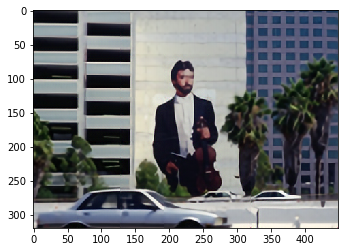

In [12]:
plt.imshow(np.clip(limage,0,1))
scipy.misc.imsave('13.jpg', np.clip(limage,0,1))

/apps/cent7/anaconda/5.1.0-py36-new/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


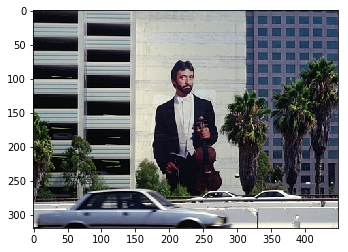

In [73]:
plt.imshow(np.clip(limagg,0,1))
scipy.misc.imsave('gt.jpg', np.clip(limagg,0,1))

In [13]:
ltl=rescale(limagg, 1.0/4, order=3,preserve_range=True)

/apps/cent7/anaconda/5.1.0-py36-new/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [14]:
ltt=rescale(ltl, 4, order=3,preserve_range=True)

/apps/cent7/anaconda/5.1.0-py36-new/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


/apps/cent7/anaconda/5.1.0-py36-new/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


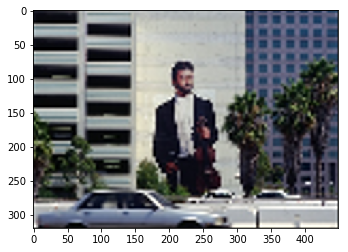

In [15]:
plt.imshow(np.clip(ltt,0,1))
scipy.misc.imsave('bicubic.jpg', np.clip(ltt,0,1))

# Test

In [14]:
img1=rgb2ycbcr(np.clip(limage,a_min=0,a_max=1))
imgg1=rgb2ycbcr(limagg)
compare_psnr(img1,imgg1)

22.20959800127573

In [47]:
img1=rgb2ycbcr(np.clip(img,a_min=0,a_max=1))
imgg1=rgb2ycbcr(imgg)
compare_psnr(img1,imgg1)

32.32459516660291

In [185]:
np.shape(img)

(128, 128, 3)

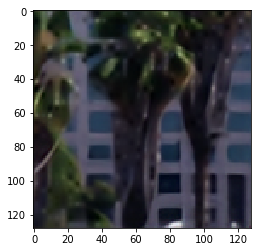

In [186]:
plt.imshow(np.clip(img,a_min=0,a_max=1))

In [61]:
compare_ssim(np.clip(img,a_min=0,a_max=1),imgg,multichannel=True)

/apps/cent7/anaconda/5.1.0-py36-new/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


0.9541815247282917

In [85]:
compare_psnr(img[3:-3],imgg[3:-3])

34.35481082670386

In [83]:
img1=rgb2ycbcr(np.clip(img,a_min=0,a_max=1))
imgg1=rgb2ycbcr(imgg)
diff=img1-imgg1
diff=diff[3:-3,3:-3]
-10 * np.log10( np.mean(diff**2))

29.926071166992188

In [84]:
compare_psnr(img1,imgg1)

29.16833561206792

In [10]:
f= h5py.File('/scratch/gilbreth/li3120/dataset/DIV2K_train_HR/Train/train_x3_DN.h5', "r")

In [11]:
label5=f['label']

In [12]:
imgl=np.squeeze(label5[11,:,:,:])

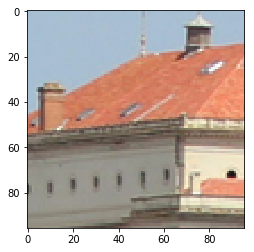

In [13]:
plt.imshow(imgl)

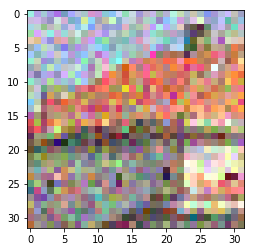

In [91]:
input5=f['input']
img2=np.squeeze(input5[11,:,:,:])
plt.imshow(img2)

In [5]:
f.close()

In [50]:
f= h5py.File('/scratch/gilbreth/li3120/RDB/Test_Result/Set5_11_1.h5', "r")
rec=f['rec']
gt=f['gt']
Ave_ssim=np.zeros((len(gt),1))
Ave_psnr=np.zeros((len(gt),1))
def rgb2ycbcr (img):
    y = 16 + (65.481 * img[:, :, 0]) + (128.553 * img[:, :, 1]) + (24.966 * img[:, :, 2])
    return y / 255
for i in range(len(gt)):
    img=np.squeeze(rec[i,:,:,:])
    imgg=np.squeeze(gt[i,:,:,:])
    img=np.clip(img,a_min=0,a_max=1)
    img=rgb2ycbcr(img)
    imgg=rgb2ycbcr(imgg)
    Ave_ssim[i]=compare_ssim(img,imgg)
    Ave_psnr[i]=compare_psnr(img,imgg)
print('average ssim:%f'%(np.mean(Ave_ssim)))
print('average psnr:%f'%(np.mean(Ave_psnr)))
f.close()

average ssim:0.942170
average psnr:32.360419


/apps/cent7/anaconda/5.1.0-py36-new/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]
